# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

# OSEMN Model

1. **OBTAIN:**
    - **Import data, inspect, check for datatypes to convert and null values**<br>
        - Display header and info
        - Drop any unneeded columns (df.drop(['col1','col2'],axis=1)

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
        - [x] Check for #'s that are store as objects (df.info())
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted
            - Decide how to deal weird/null values (df.unique(), df.isna().sum(), df.describe()-min/max, etc
        - [x]  Check for categorical variables stored as integers
    - [x] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [x] Check for multicollinearity
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and dat transformations to perform
        - Can also do kernel density estimates
    - [ ] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
        - categoricals will look like vertical lines
    - [ ] Use pd.plotting.scatter_matrix to visualize possible relationships
    - [ ] Check for linearity

   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/districtmap09122014.jpg" width=800>

### **The variables in the data set:**

- Fiscal Year Released Fiscal year (year ending June 30) for which the offender was released from prison.

- Recidivism Reporting Year 
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- Race - Ethnicity 
    - Offender's Race and Ethnicity

- Convicting Offense Classification 
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- Convicting Offense Type General category for the most serious offense for which the offender was placed in prison.

- Convicting Offense Subtype 
    - Further classification of the most serious offense for which the offender was placed in prison.

- Release Type 
    - Reasoning for Offender's release from prison.

- Main Supervising District 
    - The Judicial District supervising the offender for the longest time during the tracking period.

- Recidivism - Return to Prison 
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period

- Days to Recidivism 
    - Number of days it took before the offender returned to prison.

- New Conviction Offense Classification The same as the initial offense classification.

- New Conviction Offense Type The same as the initial offense type.

- New Conviction Offense Sub Type The same as the initial offense subtype.

- Part of Target Population 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# Importing Packages and Loading in the Dataset

In [1]:
# Import custom python package BroadSteel DataScience (bs_ds_)
from bs_ds import *

View our documentation at https://bs-ds.readthedocs.io/en/latest/bs_ds.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



In [2]:
# Enabling full-sized dataframes and info rows
big_pandas()

# Turning off warnings for function deprecations
ignore_warnings()

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


In [3]:
# Dataset Links
# mike_csv ='3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv'
# mike_csv = 'No_numbers.csv'
# mike_enhanced_df = 'Updated_class.csv'

# all_prisoners_url = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv'
# all_prisoners_file = "datasets/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv"
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_url = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/prison_recidivists_with_recidivism_type_only.csv"
only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [4]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)
# df_enhanced_col = pd.read_csv(mike_enhanced_df, index_col=0)

In [5]:
# df_enhanced_col.columns

In [6]:
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
Fiscal Year Released                     26020 non-null int64
Recidivism Reporting Year                26020 non-null int64
Race - Ethnicity                         25990 non-null object
Age At Release                           26017 non-null object
Convicting Offense Classification        26020 non-null object
Convicting Offense Type                  26020 non-null object
Convicting Offense Subtype               26020 non-null object
Release Type                             24258 non-null object
Main Supervising District                16439 non-null object
Recidivism - Return to Prison            26020 non-null object
Days to Recidivism                       8681 non-null float64
New Conviction Offense Classification    6718 non-null object
New Conviction Offense Type              6718 non-null object
New Conviction Offense Sub Type          6699 non-null object
Part of Target

None

,Fiscal Year Released,Recidivism Reporting Year,Days to Recidivism
count,26020.0000,26020.0000,8681.0000
mean,2012.6008,2015.6008,469.9315
std,1.6610,1.6610,282.3034
min,2010.0000,2013.0000,0.0000
25%,2011.0000,2014.0000,238.0000
50%,2013.0000,2016.0000,418.0000
75%,2014.0000,2017.0000,682.0000
max,2015.0000,2018.0000,1095.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:


,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
Fiscal Year Released,0,26020,0.000
Recidivism Reporting Year,0,26020,0.000
Race - Ethnicity,30,26020,0.115
Age At Release,3,26020,0.012
Convicting Offense Classification,0,26020,0.000
Convicting Offense Type,0,26020,0.000
Convicting Offense Subtype,0,26020,0.000
Release Type,1762,26020,6.772
Main Supervising District,9581,26020,36.822


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Part of Target Population,Recidivism Type,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,433.0,C Felony,Drug,Trafficking,Yes,New,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,453.0,NaN,NaN,NaN,No,Tech,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,832.0,NaN,NaN,NaN,Yes,Tech,Male


**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [7]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

Removed New.
Removed Days.
Removed Recidivism Type.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                 26020 non-null int64
Recidivism Reporting Year            26020 non-null int64
Race - Ethnicity                     25990 non-null object
Age At Release                       26017 non-null object
Convicting Offense Classification    26020 non-null object
Convicting Offense Type              26020 non-null object
Convicting Offense Subtype           26020 non-null object
Release Type                         24258 non-null object
Main Supervising District            16439 non-null object
Recidivism - Return to Prison        26020 non-null object
Part of Target Population            26020 non-null object
Sex                                  26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


In [9]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                 26020 non-null int64
Recidivism Reporting Year            26020 non-null int64
Race - Ethnicity                     25990 non-null object
Age At Release                       26017 non-null object
Convicting Offense Classification    26020 non-null object
Convicting Offense Type              26020 non-null object
Convicting Offense Subtype           26020 non-null object
Release Type                         24258 non-null object
Main Supervising District            16439 non-null object
Recidivism - Return to Prison        26020 non-null object
Part of Target Population            26020 non-null object
Sex                                  26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


None

,Fiscal Year Released,Recidivism Reporting Year
count,26020.0000,26020.0000
mean,2012.6008,2015.6008
std,1.6610,1.6610
min,2010.0000,2013.0000
25%,2011.0000,2014.0000
50%,2013.0000,2016.0000
75%,2014.0000,2017.0000
max,2015.0000,2018.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:


,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
Fiscal Year Released,0,26020,0.000
Recidivism Reporting Year,0,26020,0.000
Race - Ethnicity,30,26020,0.115
Age At Release,3,26020,0.012
Convicting Offense Classification,0,26020,0.000
Convicting Offense Type,0,26020,0.000
Convicting Offense Subtype,0,26020,0.000
Release Type,1762,26020,6.772
Main Supervising District,9581,26020,36.822


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Part of Target Population,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male


### Save original names vs short names in column_legend
- then map names onto columns

In [10]:
print(df.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')


In [11]:
# New short-hand names to use
colnames_short = ('yr_released','report_year','race_ethnicity','age_released','crime_class','crime_type','crime_subtype','release_type','super_dist','recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


## ADDRESSING NULL VALUES

In [12]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,9581,26020,36.822


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace
    - with...
- release_type has 1762 (6.77% of data)
    - drop

- **Dropping all null values from age_released, race_ethnicity, and release_type.**

In [13]:
# Dropping null values from 'age_at_release','race_ethnicity'
# df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)

# pause
# For mike's data
# df['super_dist'].fillna("unknown", inplace=True)
# df.dropna(inplace=True)

In [14]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,9581,26020,36.822


**Results of Null Check**
- super_district has 9549(36.75% of data)
    - replace
    - with 'unknown'
- release_type has 1762 (6.78% of data)
    - replace  (_could_ consider dropping)
    - with 'unknown'    

In [15]:
# Investigating values of classes with large # of NaN's
check_unique(df, columns=['super_dist']) #,'target_pop','crime_type','crime_class'])


---------------------------

super_dist Type: object
Number unique values: 10.


,super_dist
5JD,4982
1JD,2787
2JD,1988
8JD,1556
7JD,1514
3JD,1188
6JD,1098
4JD,667
ISC,350
Interstate Compact,309


- **Filling super_dist NaNs with "unknown"**

In [16]:
# Filling NA's in super_dist and release_type
df['super_dist'].fillna("unknown", inplace=True)
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,0,26020,0.000


## COMBINING AND REMAPPING CLASSES

- **Remapping race_ethnicity**
    - Going to combine hispanic and non-hispanic 

In [17]:
# Remapping race_ethnicity
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       26020 non-null int64
report_year       26020 non-null int64
race_ethnicity    25985 non-null object
age_released      26017 non-null object
crime_class       26020 non-null object
crime_type        26020 non-null object
crime_subtype     26020 non-null object
release_type      24258 non-null object
super_dist        26020 non-null object
recidivist        26020 non-null object
target_pop        26020 non-null object
sex               26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [18]:
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

- **Encoding age groups as ordinal**

In [19]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4)
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)

- **Remapping binary categories ( recidivist, target_pop, sex)**

In [20]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

#### Remapping release_type
**DECIDED NOT TO SINCE THIS COULD BE AN IMPORTANT LEVEL OF NUANCE**
- Combine Parole Grant and Parole and Paroled w/ Immediate Discharge [?]
- Combine Discharged - End of Sentence and Discharged - Expiration of Sentence
- **unknown...?** (keeping but consider dropping
- Combine Released to Special Sentence and Special Sentence
- Combine Paroled to Detainer - Out of State, Paroled to Detainer - INS, Paroled to Detainer - U.S. Marshall, Paroled to Detainer - Iowa. 

In [21]:
release_type_map = {'Parole': 'Paroled',
                    'Discharged – End of Sentence': 'Discharged - End of Sentence',
                    'Special Sentence':'Special Sentence',
                    'Parole Granted': 'Paroled',
                    'Discharged - Expiration of Sentence' : 'Discharged - End of Sentence',
                    'Paroled w/Immediate Discharge': 'Paroled',
                    'Paroled to Detainer - Iowa':'Paroled to Detainer',
                    'Paroled to Detainer - U.S. Marshall':'Paroled to Detainer',
                    'Paroled to Detainer - Out of State':'Paroled to Detainer',
                    'Released to Special Sentence':'Special Sentence',
                    'Paroled to Detainer - INS':'Paroled to Detainer',
                    'unknown':np.nan}

In [22]:
df['release_type_map'] = df['release_type'].map(release_type_map)
df['release_type_map'].value_counts()

Paroled                         15721
Discharged - End of Sentence     7374
Special Sentence                  748
Paroled to Detainer               414
Name: release_type_map, dtype: int64

## Engineering Features
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

In [23]:
df.dtypes

yr_released           int64
report_year           int64
race_ethnicity       object
age_released        float64
crime_class          object
crime_type           object
crime_subtype        object
release_type         object
super_dist           object
recidivist            int64
target_pop            int64
sex                 float64
release_type_map     object
dtype: object

In [24]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

- **Creating a 'max_sentence' feature based on crime class**
   

In [25]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)
# df['max_sentence'].value_counts().sort_index()

# Display new value counts
for col in ['recidivist','target_pop','sex']:
    print(f"{col} value counts:\n {df[col].value_counts()}")

recidivist value counts:
 0    17339
1     8681
Name: recidivist, dtype: int64
target_pop value counts:
 1    14274
0    11746
Name: target_pop, dtype: int64
sex value counts:
 0.0    22678
1.0     3339
Name: sex, dtype: int64


#### Dropping all  values replaced with np.nan

In [26]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,35,26020,0.135
age_released,3,26020,0.012
crime_class,20,26020,0.077
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,0,26020,0.000


In [27]:
# df.to_csv('iowa_recidivism_df_with_james_features_all_rows.csv')

In [28]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
index,0,24206,0.0
yr_released,0,24206,0.0
report_year,0,24206,0.0
race_ethnicity,0,24206,0.0
age_released,0,24206,0.0
crime_class,0,24206,0.0
crime_type,0,24206,0.0
crime_subtype,0,24206,0.0
release_type,0,24206,0.0


## effectml.com using grid search to optimize catbost

In [29]:
category_cols = ['yr_released','race_ethnicity',
                 'crime_class','release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony','release_type'] #,'release_type_map','crime_class_type_subtype',]
number_cols = ['max_sentence','age_released']
target_col = ['recidivist']

In [72]:
df_to_split=pd.DataFrame()
#adding in scaling for numeric data
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()
    

max_sentence
age_released


In [73]:
# Convert categoryies to codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category').cat.codes
    
# df_to_split=pd.concat([df_to_split, df[number_cols]],axis=1)
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 12 columns):
max_sentence      24206 non-null float64
age_released      24206 non-null float64
yr_released       24206 non-null int8
race_ethnicity    24206 non-null int8
crime_class       24206 non-null int8
release_type      24206 non-null int8
crime_type        24206 non-null int8
crime_subtype     24206 non-null int8
target_pop        24206 non-null int8
sex               24206 non-null int8
super_dist        24206 non-null int8
felony            24206 non-null int8
dtypes: float64(2), int8(10)
memory usage: 614.7 KB


### Add in smote to balance out the target variable

In [74]:
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())

In [75]:
from imblearn.over_sampling import SMOTE, ADASYN
print(pd.Series(y).value_counts())
X_resampled, y_resampled = SMOTE().fit_sample(X,y)
print(pd.Series(y_resampled).value_counts())

0    15880
1     8326
dtype: int64
1    15880
0    15880
dtype: int64


In [76]:
X_resampled =pd.DataFrame(X_resampled, columns = X.columns)
y_resampled =pd.Series(y_resampled)
y_resampled.name ='recidivist'

In [77]:
# inspect_df(X_resampled)

In [78]:
# convert X_resampled columns backt o int
for header in category_cols:
    X_resampled[header] = X_resampled[header].astype('int')

In [79]:
X_resampled.dtypes

max_sentence      float64
age_released      float64
yr_released         int32
race_ethnicity      int32
crime_class         int32
release_type        int32
crime_type          int32
crime_subtype       int32
target_pop          int32
sex                 int32
super_dist          int32
felony              int32
dtype: object

### Using CatBoostClassifier and Pool

In [80]:
from catboost import Pool, CatBoostClassifier
# X_train, X_test, y_train, y_test = train_test_split(df_to_split, df[target_col])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [81]:
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [82]:
cb_clf = CatBoostClassifier(iterations=3000, depth=12, boosting_type='Ordered', learning_rate=0.01,thread_count=-1,eval_metric='AUC', silent=True, allow_const_label=True,task_type='GPU')


In [83]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=20)
cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7447263	test: 0.7330227	best: 0.7330227 (0)	total: 1.25s	remaining: 1h 2m 14s
1:	learn: 0.7495083	test: 0.7413317	best: 0.7413317 (1)	total: 2.07s	remaining: 51m 48s
2:	learn: 0.7540641	test: 0.7423448	best: 0.7423448 (2)	total: 3.23s	remaining: 53m 51s
3:	learn: 0.7552506	test: 0.7436363	best: 0.7436363 (3)	total: 4.44s	remaining: 55m 24s
4:	learn: 0.7560348	test: 0.7446492	best: 0.7446492 (4)	total: 5.63s	remaining: 56m 14s
5:	learn: 0.7564788	test: 0.7454785	best: 0.7454785 (5)	total: 6.82s	remaining: 56m 45s
6:	learn: 0.7567749	test: 0.7461596	best: 0.7461596 (6)	total: 8.05s	remaining: 57m 20s
7:	learn: 0.7571315	test: 0.7465756	best: 0.7465756 (7)	total: 9.27s	remaining: 57m 48s
8:	learn: 0.7580729	test: 0.7484843	best: 0.7484843 (8)	total: 10.5s	remaining: 58m 4s
9:	learn: 0.7591252	test: 0.7500903	best: 0.7500903 (9)	total: 11.7s	remaining: 58m 22s
10:	learn: 0.7600553	test: 0.7513497	best: 0.7513497 (10)	total: 12.9s	remaining: 58m 38s
11:	learn: 0.7597201	test: 0.

92:	learn: 0.7784388	test: 0.7660128	best: 0.7660128 (92)	total: 1m 48s	remaining: 56m 37s
93:	learn: 0.7784409	test: 0.7660100	best: 0.7660128 (92)	total: 1m 49s	remaining: 56m 37s
94:	learn: 0.7785304	test: 0.7661813	best: 0.7661813 (94)	total: 1m 51s	remaining: 56m 36s
95:	learn: 0.7786323	test: 0.7662842	best: 0.7662842 (95)	total: 1m 52s	remaining: 56m 36s
96:	learn: 0.7788211	test: 0.7663777	best: 0.7663777 (96)	total: 1m 53s	remaining: 56m 36s
97:	learn: 0.7789088	test: 0.7664116	best: 0.7664116 (97)	total: 1m 54s	remaining: 56m 36s
98:	learn: 0.7790357	test: 0.7664496	best: 0.7664496 (98)	total: 1m 55s	remaining: 56m 35s
99:	learn: 0.7790427	test: 0.7664611	best: 0.7664611 (99)	total: 1m 57s	remaining: 56m 33s
100:	learn: 0.7795827	test: 0.7668887	best: 0.7668887 (100)	total: 1m 58s	remaining: 56m 33s
101:	learn: 0.7795995	test: 0.7668698	best: 0.7668887 (100)	total: 1m 59s	remaining: 56m 33s
102:	learn: 0.7797124	test: 0.7668907	best: 0.7668907 (102)	total: 2m	remaining: 56m 3

181:	learn: 0.7893550	test: 0.7722237	best: 0.7722237 (181)	total: 3m 30s	remaining: 54m 24s
182:	learn: 0.7894765	test: 0.7723015	best: 0.7723015 (182)	total: 3m 32s	remaining: 54m 23s
183:	learn: 0.7897829	test: 0.7725832	best: 0.7725832 (183)	total: 3m 33s	remaining: 54m 22s
184:	learn: 0.7898922	test: 0.7726362	best: 0.7726362 (184)	total: 3m 34s	remaining: 54m 22s
185:	learn: 0.7900728	test: 0.7727197	best: 0.7727197 (185)	total: 3m 35s	remaining: 54m 21s
186:	learn: 0.7900932	test: 0.7727647	best: 0.7727647 (186)	total: 3m 36s	remaining: 54m 20s
187:	learn: 0.7901346	test: 0.7727887	best: 0.7727887 (187)	total: 3m 37s	remaining: 54m 19s
188:	learn: 0.7903256	test: 0.7727866	best: 0.7727887 (187)	total: 3m 39s	remaining: 54m 18s
189:	learn: 0.7904614	test: 0.7728515	best: 0.7728515 (189)	total: 3m 40s	remaining: 54m 17s
190:	learn: 0.7905769	test: 0.7729066	best: 0.7729066 (190)	total: 3m 41s	remaining: 54m 16s
191:	learn: 0.7906482	test: 0.7729409	best: 0.7729409 (191)	total: 3m 

270:	learn: 0.7978692	test: 0.7768404	best: 0.7768404 (270)	total: 5m 9s	remaining: 51m 59s
271:	learn: 0.7979119	test: 0.7768923	best: 0.7768923 (271)	total: 5m 10s	remaining: 51m 59s
272:	learn: 0.7979135	test: 0.7768835	best: 0.7768923 (271)	total: 5m 12s	remaining: 51m 57s
273:	learn: 0.7980114	test: 0.7768839	best: 0.7768923 (271)	total: 5m 13s	remaining: 51m 56s
274:	learn: 0.7981025	test: 0.7769074	best: 0.7769074 (274)	total: 5m 14s	remaining: 51m 55s
275:	learn: 0.7981978	test: 0.7769719	best: 0.7769719 (275)	total: 5m 15s	remaining: 51m 55s
276:	learn: 0.7982308	test: 0.7770004	best: 0.7770004 (276)	total: 5m 16s	remaining: 51m 54s
277:	learn: 0.7983776	test: 0.7771067	best: 0.7771067 (277)	total: 5m 17s	remaining: 51m 53s
278:	learn: 0.7984051	test: 0.7771265	best: 0.7771265 (278)	total: 5m 19s	remaining: 51m 52s
279:	learn: 0.7984383	test: 0.7771548	best: 0.7771548 (279)	total: 5m 20s	remaining: 51m 51s
280:	learn: 0.7985063	test: 0.7771770	best: 0.7771770 (280)	total: 5m 2

359:	learn: 0.8043230	test: 0.7792078	best: 0.7792078 (359)	total: 6m 54s	remaining: 50m 37s
360:	learn: 0.8043659	test: 0.7792279	best: 0.7792279 (360)	total: 6m 55s	remaining: 50m 36s
361:	learn: 0.8044603	test: 0.7792471	best: 0.7792471 (361)	total: 6m 56s	remaining: 50m 35s
362:	learn: 0.8046374	test: 0.7792485	best: 0.7792485 (362)	total: 6m 57s	remaining: 50m 34s
363:	learn: 0.8047403	test: 0.7792444	best: 0.7792485 (362)	total: 6m 58s	remaining: 50m 33s
364:	learn: 0.8047307	test: 0.7792381	best: 0.7792485 (362)	total: 6m 59s	remaining: 50m 24s
365:	learn: 0.8048251	test: 0.7792355	best: 0.7792485 (362)	total: 7m	remaining: 50m 23s
366:	learn: 0.8049781	test: 0.7792639	best: 0.7792639 (366)	total: 7m 1s	remaining: 50m 23s
367:	learn: 0.8050383	test: 0.7793000	best: 0.7793000 (367)	total: 7m 2s	remaining: 50m 22s
368:	learn: 0.8051443	test: 0.7793361	best: 0.7793361 (368)	total: 7m 3s	remaining: 50m 21s
369:	learn: 0.8051642	test: 0.7793389	best: 0.7793389 (369)	total: 7m 4s	rema

448:	learn: 0.8092262	test: 0.7805427	best: 0.7805427 (448)	total: 8m 32s	remaining: 48m 31s
449:	learn: 0.8092400	test: 0.7805423	best: 0.7805427 (448)	total: 8m 32s	remaining: 48m 25s
450:	learn: 0.8092551	test: 0.7805497	best: 0.7805497 (450)	total: 8m 33s	remaining: 48m 24s
451:	learn: 0.8093317	test: 0.7805431	best: 0.7805497 (450)	total: 8m 35s	remaining: 48m 23s
452:	learn: 0.8093328	test: 0.7805425	best: 0.7805497 (450)	total: 8m 36s	remaining: 48m 22s
453:	learn: 0.8094061	test: 0.7805634	best: 0.7805634 (453)	total: 8m 37s	remaining: 48m 21s
454:	learn: 0.8094151	test: 0.7805840	best: 0.7805840 (454)	total: 8m 38s	remaining: 48m 20s
455:	learn: 0.8094797	test: 0.7805911	best: 0.7805911 (455)	total: 8m 39s	remaining: 48m 19s
456:	learn: 0.8095281	test: 0.7805896	best: 0.7805911 (455)	total: 8m 40s	remaining: 48m 18s
457:	learn: 0.8095483	test: 0.7805968	best: 0.7805968 (457)	total: 8m 41s	remaining: 48m 16s
458:	learn: 0.8095588	test: 0.7806103	best: 0.7806103 (458)	total: 8m 

537:	learn: 0.8137541	test: 0.7814096	best: 0.7814096 (537)	total: 10m 13s	remaining: 46m 49s
538:	learn: 0.8137694	test: 0.7814282	best: 0.7814282 (538)	total: 10m 15s	remaining: 46m 48s
539:	learn: 0.8138476	test: 0.7814368	best: 0.7814368 (539)	total: 10m 16s	remaining: 46m 47s
540:	learn: 0.8138963	test: 0.7814429	best: 0.7814429 (540)	total: 10m 17s	remaining: 46m 46s
541:	learn: 0.8139218	test: 0.7814322	best: 0.7814429 (540)	total: 10m 18s	remaining: 46m 45s
542:	learn: 0.8139522	test: 0.7814242	best: 0.7814429 (540)	total: 10m 19s	remaining: 46m 42s
543:	learn: 0.8140746	test: 0.7814511	best: 0.7814511 (543)	total: 10m 20s	remaining: 46m 41s
544:	learn: 0.8140995	test: 0.7814562	best: 0.7814562 (544)	total: 10m 21s	remaining: 46m 40s
545:	learn: 0.8141333	test: 0.7814707	best: 0.7814707 (545)	total: 10m 22s	remaining: 46m 39s
546:	learn: 0.8141550	test: 0.7814716	best: 0.7814716 (546)	total: 10m 23s	remaining: 46m 38s
547:	learn: 0.8141709	test: 0.7814763	best: 0.7814763 (547)	

625:	learn: 0.8170816	test: 0.7820521	best: 0.7820551 (623)	total: 11m 50s	remaining: 44m 53s
626:	learn: 0.8171403	test: 0.7820561	best: 0.7820561 (626)	total: 11m 51s	remaining: 44m 52s
627:	learn: 0.8171882	test: 0.7820831	best: 0.7820831 (627)	total: 11m 52s	remaining: 44m 51s
628:	learn: 0.8172102	test: 0.7820819	best: 0.7820831 (627)	total: 11m 53s	remaining: 44m 50s
629:	learn: 0.8172295	test: 0.7820856	best: 0.7820856 (629)	total: 11m 54s	remaining: 44m 49s
630:	learn: 0.8172797	test: 0.7820957	best: 0.7820957 (630)	total: 11m 56s	remaining: 44m 48s
631:	learn: 0.8173304	test: 0.7821004	best: 0.7821004 (631)	total: 11m 57s	remaining: 44m 47s
632:	learn: 0.8173521	test: 0.7820956	best: 0.7821004 (631)	total: 11m 58s	remaining: 44m 46s
633:	learn: 0.8173750	test: 0.7820947	best: 0.7821004 (631)	total: 11m 59s	remaining: 44m 45s
634:	learn: 0.8174385	test: 0.7821135	best: 0.7821135 (634)	total: 12m	remaining: 44m 44s
635:	learn: 0.8175122	test: 0.7821210	best: 0.7821210 (635)	tota

713:	learn: 0.8206807	test: 0.7824477	best: 0.7824477 (713)	total: 13m 30s	remaining: 43m 15s
714:	learn: 0.8206961	test: 0.7824455	best: 0.7824477 (713)	total: 13m 31s	remaining: 43m 14s
715:	learn: 0.8207794	test: 0.7824498	best: 0.7824498 (715)	total: 13m 33s	remaining: 43m 13s
716:	learn: 0.8208069	test: 0.7824533	best: 0.7824533 (716)	total: 13m 34s	remaining: 43m 12s
717:	learn: 0.8208795	test: 0.7824626	best: 0.7824626 (717)	total: 13m 35s	remaining: 43m 11s
718:	learn: 0.8208986	test: 0.7824689	best: 0.7824689 (718)	total: 13m 35s	remaining: 43m 7s
719:	learn: 0.8209996	test: 0.7824849	best: 0.7824849 (719)	total: 13m 36s	remaining: 43m 6s
720:	learn: 0.8210016	test: 0.7824874	best: 0.7824874 (720)	total: 13m 37s	remaining: 43m 5s
721:	learn: 0.8210734	test: 0.7824799	best: 0.7824874 (720)	total: 13m 39s	remaining: 43m 4s
722:	learn: 0.8211416	test: 0.7824757	best: 0.7824874 (720)	total: 13m 40s	remaining: 43m 3s
723:	learn: 0.8211451	test: 0.7824742	best: 0.7824874 (720)	total

801:	learn: 0.8242413	test: 0.7827336	best: 0.7827452 (799)	total: 15m 8s	remaining: 41m 30s
802:	learn: 0.8242899	test: 0.7827443	best: 0.7827452 (799)	total: 15m 10s	remaining: 41m 29s
803:	learn: 0.8243637	test: 0.7827591	best: 0.7827591 (803)	total: 15m 11s	remaining: 41m 28s
804:	learn: 0.8243921	test: 0.7827494	best: 0.7827591 (803)	total: 15m 12s	remaining: 41m 27s
805:	learn: 0.8244003	test: 0.7827452	best: 0.7827591 (803)	total: 15m 13s	remaining: 41m 26s
806:	learn: 0.8244430	test: 0.7827395	best: 0.7827591 (803)	total: 15m 14s	remaining: 41m 25s
807:	learn: 0.8244712	test: 0.7827502	best: 0.7827591 (803)	total: 15m 15s	remaining: 41m 24s
808:	learn: 0.8245058	test: 0.7827570	best: 0.7827591 (803)	total: 15m 16s	remaining: 41m 23s
809:	learn: 0.8245719	test: 0.7827584	best: 0.7827591 (803)	total: 15m 18s	remaining: 41m 22s
810:	learn: 0.8246260	test: 0.7827603	best: 0.7827603 (810)	total: 15m 19s	remaining: 41m 21s
811:	learn: 0.8246485	test: 0.7827596	best: 0.7827603 (810)	t

{'learn': {'Logloss': 0.5017439860641005, 'AUC': 0.8265872001647949},
 'validation_0': {'Logloss': 0.5354916743127165, 'AUC': 0.782871663570404}}

In [ ]:
checK_unique(df_to_split,'release_type')

_____________________________________________

### Adding catboost optimizier 

In [42]:
#     from skopt import gp_minimize
#     from skopt.space import Real, Integer
#     from skopt.utils import use_named_args
#     from skopt.plots import plot_convergence
# class ModelOptimizer:
#     from skopt import gp_minimize
#     from skopt.space import Real, Integer
#     from skopt.utils import use_named_args
#     from skopt.plots import plot_convergence
#     best_score = None
#     opt = None
    
#     def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=2405, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
#         self.model = model
#         self.X_train = X_train
#         self.y_train = y_train
#         self.categorical_columns_indices = categorical_columns_indices
#         self.n_fold = n_fold
#         self.seed = seed
#         self.early_stopping_rounds = early_stopping_rounds
#         self.is_stratified = is_stratified
#         self.is_shuffle = is_shuffle
        
        
#     def update_model(self, **kwargs):
#         for k, v in kwargs.items():
#             setattr(self.model, k, v)
            
#     def evaluate_model(self):
#         pass
    
#     def optimize(self, param_space, max_evals=10, n_random_starts=2):
#         start_time = time.time()
        
#         @use_named_args(param_space)
#         def _minimize(**params):
#             self.model.set_params(**params)
#             return self.evaluate_model()
        
#         opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
#         best_values = opt.x
#         optimal_values = dict(zip([param.name for param in param_space], best_values))
#         best_score = opt.fun
#         self.best_score = best_score
#         self.opt = opt
        
#         print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
#         print('updating model with optimal values')
#         self.update_model(**optimal_values)
#         plot_convergence(opt)
#         return optimal_values

# class XgbOptimizer(ModelOptimizer):
#     def evaluate_model(self):
#         scores = xgboost.cv(self.model.get_xgb_params(), 
#                     xgboost.DMatrix(self.X_train, label=self.y_train),
#                     num_boost_round=self.model.n_estimators, 
#                     metrics='auc', 
#                     nfold=self.n_fold, 
#                     stratified=self.is_stratified,
#                     shuffle=self.is_shuffle,
#                     seed=self.seed,
#                     early_stopping_rounds=self.early_stopping_rounds)
#         self.scores = scores
#         test_scores = scores.iloc[:, 2]
#         best_metric = test_scores.max()
#         return 1 - best_metric
    
# class CatboostOptimizer(ModelOptimizer):
#     def evaluate_model(self):
#         validation_scores = catboost.cv(
#                                 catboost.Pool(
#                                     self.X_train, 
#                                     self.y_train, 
#                                     cat_features=self.categorical_columns_indices),

#                                 self.model.get_params(), 
#                                 nfold=self.n_fold,
#                                 stratified=self.is_stratified,
#                                 seed=self.seed,
#                                 early_stopping_rounds=self.early_stopping_rounds,
#                                 shuffle=self.is_shuffle,
# #                               eval_metric ='AUC',
#                                 plot=False
#                                 )
                                
#         self.scores = validation_scores
#         test_scores = validation_scores.iloc[:, 2]
#         best_metric = test_scores.max()
#         return 1 - best_metric
    
# class LightGBMOptimizer(ModelOptimizer):
#     def evaluate_model(self):
#         lgb_dataset = lgb.Dataset(self.X_train, 
#                                   self.y_train, 
#                                   self.categorical_columns_indices)
#         eval_hist = lgb.cv(self.model.get_params(), 
#                            lgb_dataset,
#                            self.model.n_estimators, 
#                            nfold=self.n_fold,
#                            seed=self.seed, 
#                            stratified=self.is_stratified, 
#                            shuffle=self.is_shuffle,
#                            early_stopping_rounds=self.early_stopping_rounds, 
#                            metrics='auc')
#         self.scores = eval_hist
#         test_scores = eval_hist[list(eval_hist.keys())[0]]
#         best_metric = max(test_scores)
#         return 1 - best_metric

In [43]:
# import catboost

In [44]:
# class CatboostOptimizer(ModelOptimizer):
#     def evaluate_model(self):
#         validation_scores = catboost.cv(
#                                 catboost.Pool(
#                                     self.X_train, 
#                                     self.y_train, 
#                                     cat_features=self.categorical_columns_indices),

#                                 self.model.get_params(), 
#                                 nfold=self.n_fold,
#                                 stratified=self.is_stratified,
#                                 seed=self.seed,
#                                 early_stopping_rounds=self.early_stopping_rounds,
#                                 shuffle=self.is_shuffle,
# #                               eval_metric ='AUC',
#                                 plot=False
#                                 )
                                
#         self.scores = validation_scores
#         test_scores = validation_scores.iloc[:, 2]
#         best_metric = test_scores.max()
#         return 1 - best_metric

In [45]:
# cbo = CatboostOptimizer(cb_clf, X_train, y_train, categorical_columns_indices=category_cols)

In [46]:
# cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
#                          one_hot_max_size=2,
#                          loss_function='Logloss',
#                          eval_metric='AUC',
#                          boosting_type='Ordered', # use permutations
#                          random_seed=2405, 
#                          use_best_model=True,
#                         verbose=True,
#                                 thread_count=-1)
# one_cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
# params_space = [Real(0.01, 0.1, name='learning_rate'), 
#                 Integer(2, 10, name='max_depth'), 
#                 Real(0.5, 1.0, name='colsample_bylevel'), 
#                 Real(1.0, 16.0, name='scale_pos_weight'), 
#                 Real(0.0, 100, name='bagging_temperature'), 
#                 Real(0.0, 100, name='random_strength'), 
#                 Real(1.0, 100, name='reg_lambda')]
# one_cb_optimal_values = one_cb_optimizer.optimize(params_space, max_evals=40, n_random_starts=4)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_test_pred = cb_clf.predict(X_test)

In [49]:
# confusion_matrix(y_test, y_test_pred)
from bs_ds import plot_confusion_matrix

In [50]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

filename = 'finalized_model.sav'
pickle.dump(cb_clf, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [51]:
pause

NameError: name 'pause' is not defined

In [53]:
cb_clf.feature_importances_, cb_clf.feature_names_

(array([ 6.32641501, 64.92718729,  3.90346833,  1.89688986,  2.13052328,
         4.29892536,  2.68405223,  4.37363091,  0.33806364,  1.84330263,
         7.20680267,  0.07073879]),
 ['max_sentence',
  'age_released',
  'yr_released',
  'race_ethnicity',
  'crime_class',
  'release_type',
  'crime_type',
  'crime_subtype',
  'target_pop',
  'sex',
  'super_dist',
  'felony'])

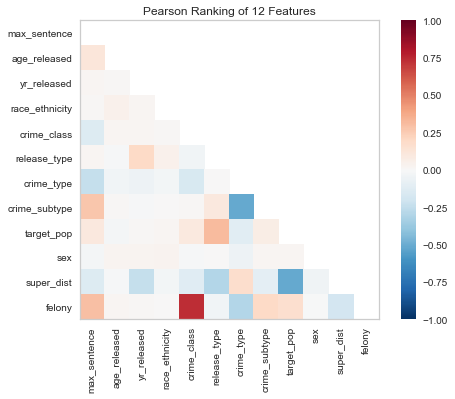

In [56]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X_train)
visualizer.poof()

In [62]:
cb = cb_clf

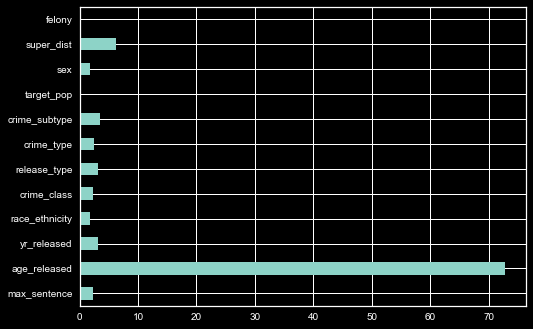

In [89]:
# Plot Feature Importances
df_plot = pd.Series(cb_clf.feature_importances_, index=cb_clf.feature_names_)
with plt.style.context('dark_background'):
    df_plot.plot(kind='barh')

In [100]:
#profilereport
import pandas_profiling as pp
pp.ProfileReport(X_train)

Number of variables,13
Number of observations,19056
Total Missing (%),0.0%
Total size in memory,1.2 MiB
Average record size in memory,64.0 B
Numeric,10
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [101]:
from bs_ds.bs_ds import plot_confusion_matrix

In [102]:
plot_confusion_matrix()

TypeError: plot_confusion_matrix() missing 2 required positional arguments: 'cm' and 'classes'

## One-Hot Encoded Categories for Thick_Pipe, other metrics

In [90]:
category_cols = ['yr_released','race_ethnicity',
                 'crime_class','release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony','release_type'] #,'release_type_map','crime_class_type_subtype',]
number_cols = ['max_sentence','age_released']
target_col = ['recidivist']

In [91]:
df_one_hot=pd.DataFrame()
df_one_hot = pd.concat([df[category_cols],df[number_cols]],axis=1)

#adding in scaling for numeric data
sca = StandardScaler()
for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_one_hot[header] = res.ravel()
    

# Convert categoryies to codes
df_one_hot = pd.get_dummies(df, columns=category_cols)
df_one_hot.drop('index',axis=1,inplace=True)
df_one_hot.info()

max_sentence
age_released
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 97 columns):
report_year                                         24206 non-null int64
age_released                                        24206 non-null float64
recidivist                                          24206 non-null int64
release_type_map                                    24206 non-null object
crime_types_combined                                24206 non-null object
crime_class_type_subtype                            24206 non-null object
max_sentence                                        24206 non-null float64
yr_released_2010                                    24206 non-null uint8
yr_released_2011                                    24206 non-null uint8
yr_released_2012                                    24206 non-null uint8
yr_released_2013                                    24206 non-null uint8
yr_released_2014                                    242

In [92]:
X = df_one_hot.drop(['release_type_map','crime_types_combined','crime_class_type_subtype'],axis=1)
y = pd.Series(df[target_col].to_numpy().ravel())

In [93]:
from imblearn.over_sampling import SMOTE, ADASYN
print(pd.Series(y).value_counts())
X_resampled, y_resampled = SMOTE().fit_sample(X,y)
print(pd.Series(y_resampled).value_counts())

0    15880
1     8326
dtype: int64
1    15880
0    15880
dtype: int64


In [94]:
X_resampled =pd.DataFrame(X_resampled, columns = X.columns)
y_resampled =pd.Series(y_resampled)
y_resampled.name ='recidivist'

In [ ]:
# inspect_df(X_resampled)

In [ ]:
# # convert X_resampled columns backt o int
# for header in category_cols:
#     X_resampled[header] = X_resampled[header].astype('int')

In [ ]:
# X_resampled.dtypes

In [ ]:
# thick_pipe(X_train, y_train,verbose=0)

In [ ]:
# # From Medium article
# cb = CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
#                          one_hot_max_size=2,
#                          loss_function='Logloss',
#                          eval_metric='AUC',
#                          boosting_type='Ordered', # use permutations
#                          random_seed=2405, 
#                          use_best_model=True,
#                          silent=True)
# cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
# params_space = [Real(0.01, 0.8, name='learning_rate'),]
# cb_optimal_values = cb_optimizer.optimize(params_space)

## Random Forests

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [96]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
forest.score(X_test,y_test)

0.6771882871536524

### Save full df with original and remapped before dropping original.

In [ ]:
# saving mapped data
# df.to_csv('recidivism_remapped_orig_names_kept_release_type.csv')

In [ ]:
stop

In [ ]:
# vars_to_drop = ['report_year']
# for x in vars_to_drop:
#     df.drop(x,axis=1,inplace=True)
# df.info()

# Jump to Here and Load CSV


In [ ]:
from bs_ds.bamboo import *

In [ ]:
from bs_ds.imports import *

In [ ]:
# df.to_csv('df_remapped_origs_dropped.csv')
# df = pd.read_csv('recidivism_remapped_classes.csv')
# df.drop('Unnamed: 0',axis=1,inplace=True)

# Re-inspecting dataframe prior to EDA
~~Converting categorical variables to category type before encoding~~


In [ ]:
inspect_df(df)

In [ ]:
# for col in df.dtype=='object':
#     df[col] = df[col].astype('category')
# df.info()

### Encoding categorical columns using LabelLibrary()


In [ ]:
df.dtypes

In [ ]:
vars_label_encode = ['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype', 'super_dist', 'release_type','felony']

In [ ]:
from bs_ds.bamboo import LabelLibrary
lablib = LabelLibrary()
df_code = lablib.fit_transform(df,vars_label_encode)

df_code.head()

# EDA

In [ ]:
df_code.info()

In [ ]:
from bs_ds.bamboo import plot_hist_scat
plot_hist_scat(df_code,'recidivist')

In [ ]:
from bs_ds.bamboo import multiplot
multiplot(df_code.drop('report_year',axis=1))

## Comments on Data 

- Everything looks good to go with the possible exception of recivisidm_year. 
- Keeping for now. 

# Preprocessing for Modeling

In [ ]:
df.drop(['report_year'],axis=1,inplace=True)

In [ ]:
inspect_df(df,verbose=False)

In [ ]:
X = pd.get_dummies(df.drop(['recidivist','report_year','yr_released'],axis=1),drop_first=True)
y = df.recidivist

In [ ]:
X.info()

In [ ]:
df_code = []

In [ ]:
from bs_ds.bs_ds import scale_data, thick_pipe, compare_pipes, make_config_dict,make_random_config_dict

## Using bs_ds.bs_ds.thick_pipe 
1. Try scaling the features with different scalers for improves results
2. Use highest score to determine which models to try first.
2B. Test parameters compare_pipes using search = 'random', get best estimators from it
- When find the best parameters, use those to zero in on a smaller range to test again with compare pipes with smaller ranges of parameters
- Some of the models that are more computatinally intensive that may want to be tested in small batches or 1 at a time:
    - LogRegCV, XGB, GradBoost, AdaBoost

In [ ]:
# X.to_csv('X_one_hot.csv')

In [ ]:
# y.to_csv('y_recidivist.csv')

In [ ]:
n_comp = X.shape[1]-1

In [ ]:
# bookmark

In [ ]:
pipe_res = thick_pipe(X,y,n_comp,verbose=False);
# pipe_res = thick_pipe(X,y,verbose=False);

- Notes on thick pipe run # 1(ish)
    - Very similar results for most models(except dectree, randomfor)
    - Best score is 0.0.68 gradboost
- Notes on run # 2 (one-hot encoded everything but years and target)
    - Basically same performance, but xgb eeks out .6782
    
| ---- | ---- | ---- |
|0	LogReg: 0.6779|,1	SVC:	0.6698, 2	DecTree:	0.6318, 3	RandFor:	0.6391, 4	AdaBoost:	0.6697, 5	GradBoost:	0.6780, 6	xgb	0.6782

## Baseline Classifier


In [ ]:
stop

### Catboost

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

In [ ]:
df=pd.read_csv('recidivism_remapped_classes.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df_cat = df.filter(regex='map',axis=1)
df_cat.head()

In [ ]:
inspect_df(df)

In [ ]:
X = df.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
catboost_pool = Pool(X_train, y_train)

In [ ]:
model = CatBoostClassifier(iterations=3,
                          depth=4,
                          learning_rate = 1,
                          loss_function = 'CrossEntropy',
                          verbose=True,
                          task_type="GPU")

In [ ]:
# model.fit(X_train, y_train)
model.fit(catboost_pool)

In [ ]:
# import pickle
# filename = 'pickles/cat_boost.pickle'
# pickling_on = open(filename,'wb')
# pickle.dump(model,pickling_on)
# pickling_on.close()

In [ ]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

print("class = ", preds_class)
print("proba = ", preds_proba)

### Simple Decision Tree Classifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier()

In [ ]:
# params={'max_depth':10}
# tree_clf.set_params(**params)

In [ ]:
# tree_clf.fit(X_train, y_train)

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [ ]:
# clf_tree.

In [ ]:
# plot_feature_importances(tree_clf)

In [ ]:
# from bs_ds.bs_ds import viz_tree
# viz_tree(tree_clf)


### Assessing Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# pred = tree_clf.predict(X_test)
# print(confusion_matrix(y_test,pred))
# print(classification_report(y_test, pred))
# print(accuracy_score(y_test,pred))

In [ ]:
# tree_clf.score(X_test, y_test)

## Bagged Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import  DecisionTreeClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5), n_estimators=20, n_jobs=-1, bootstrap_features=True)

In [ ]:
bagged_tree.fit(X_train, y_train)

In [ ]:
bagged_tree.score(X_train,y_train)

In [ ]:
y_pred = bagged_tree.predict(X_test)
bagged_tree.score(X_test, y_test)

In [ ]:
stop

In [ ]:
from bs_ds.bs_ds import *

In [ ]:
# from bs_ds.bs_ds import tune_params_trees
config_dict = make_random_config_dict()
compare_pipes(X_train,y_train,X_test,y_test,config_dict)


## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=10)
forest.fit(X_train, y_train)

In [ ]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

## Adding xgb, gbc

In [ ]:
import os
import sys
sys.path.append('C:\\Program\ Files\ \(x86\)\\Graphviz2.38\\bin')

In [ ]:
clf_xgb = xgboost.sklearn.XGBClassifier()
clf_gbc = GradientBoostingClassifier()

In [ ]:
clf_gbc.fit()

In [ ]:
plot_feature_importances(tree_clf)